In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)

# Data Processing and EDA

In [87]:
df= pd.read_csv(r"C:\Users\16479\Downloads\Customer_Data.csv")

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [89]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [90]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


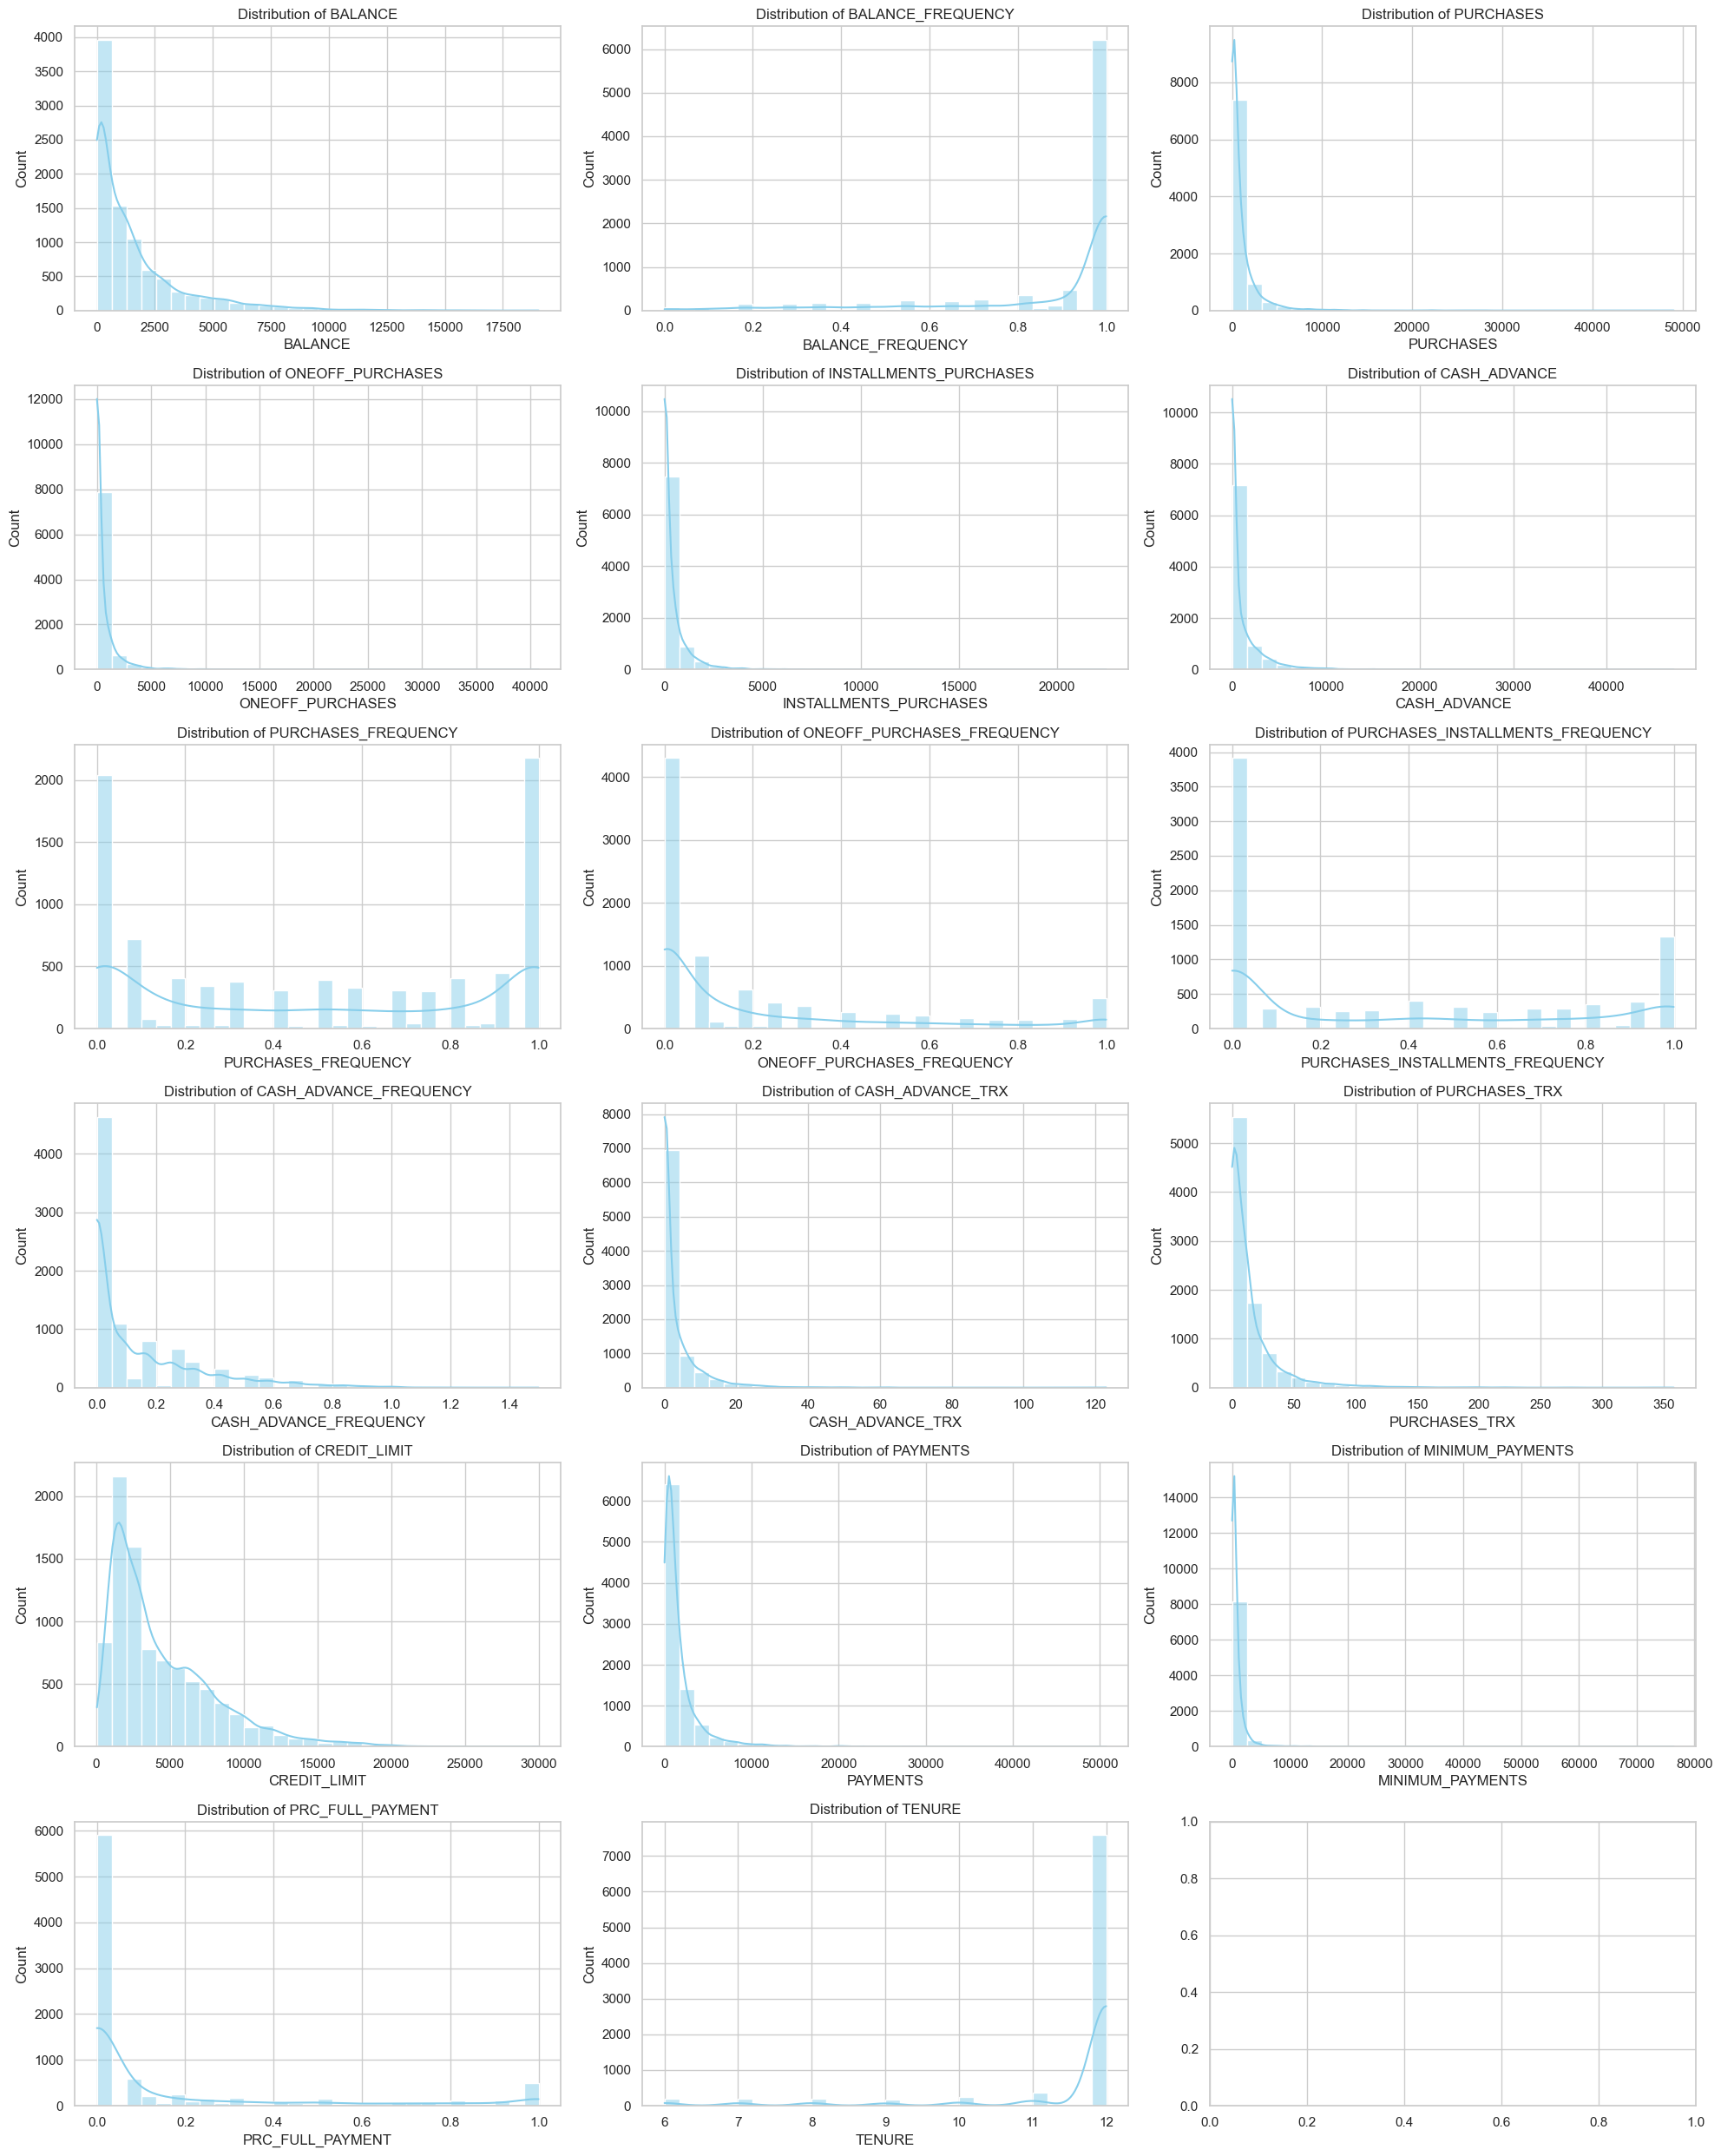

In [91]:
numerical_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

# Setting up subplots for histplot
fig, axes = plt.subplots(6, 3, figsize=(20, 25))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting histplot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column].dropna(), kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [92]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [93]:
df = df.dropna()

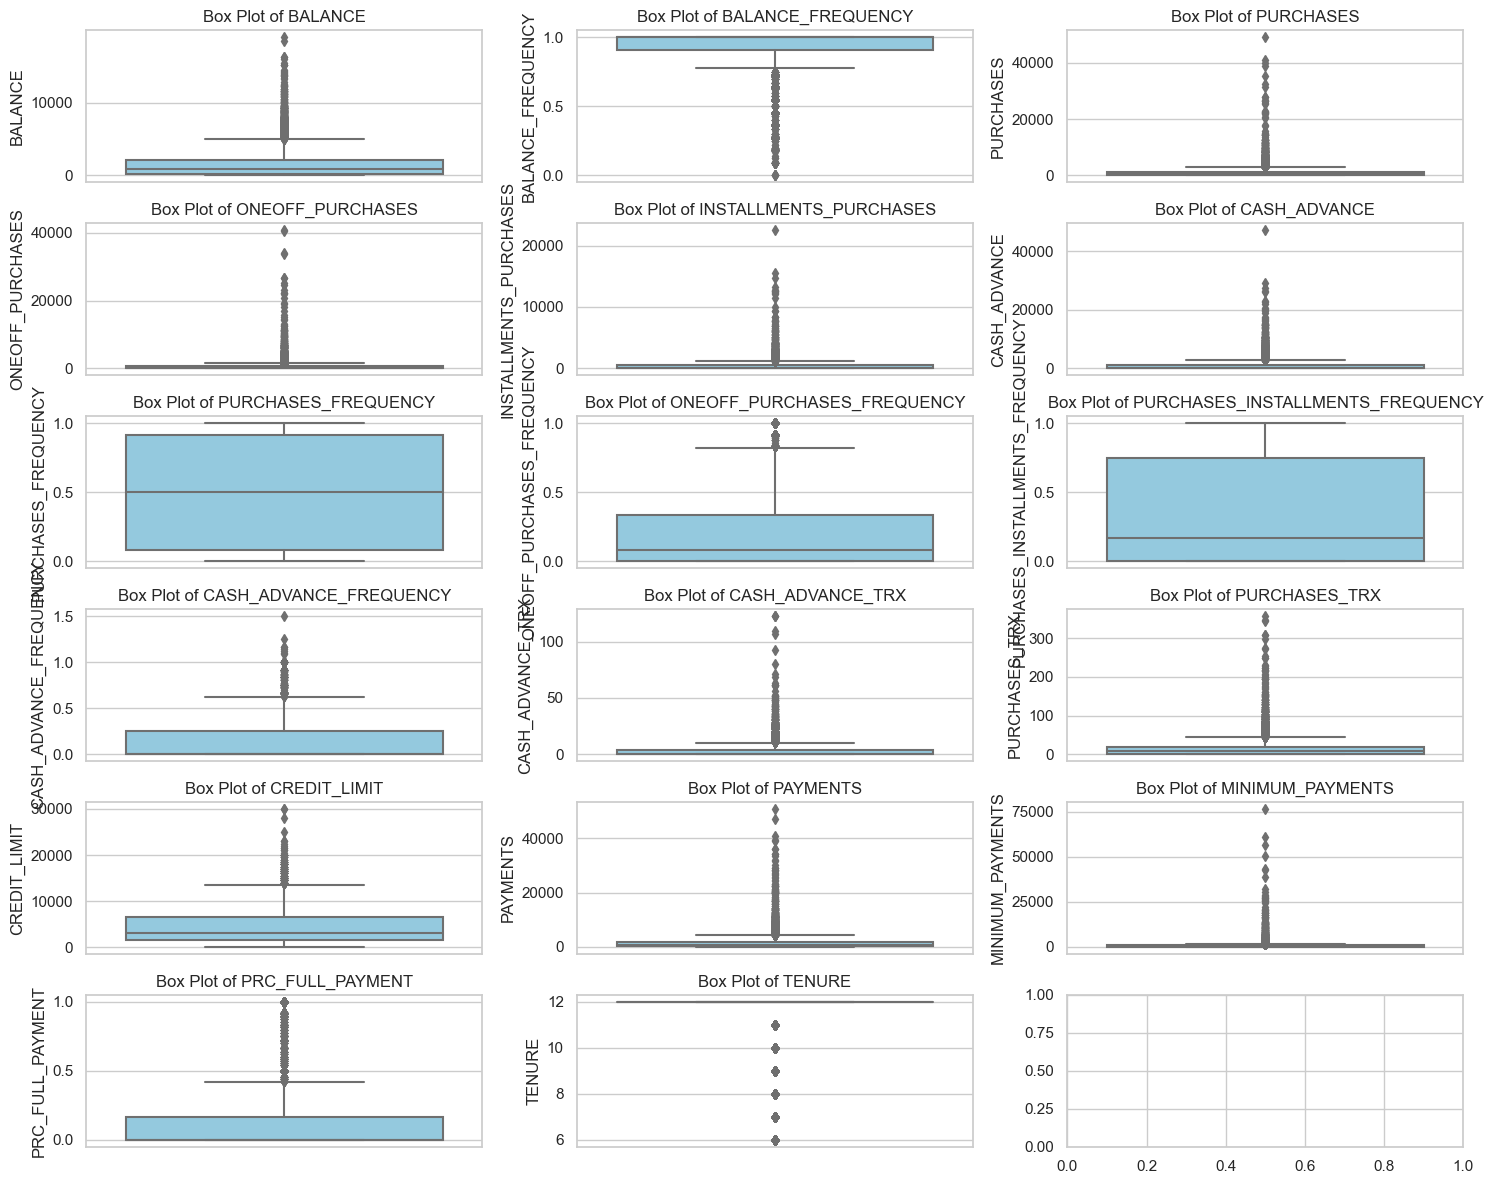

In [94]:
# Assuming 'df' is the original DataFrame
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of required subplots
num_cols = len(df_numeric.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensure there's an extra row if there are remaining columns

# Setting up subplots for box plots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 2*num_rows))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting box plots for each numeric feature
for i, column in enumerate(df_numeric.columns):
    # Convert NumPy array to Pandas Series
    sns.boxplot(y=pd.Series(df[column]), ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()


In [95]:
print(len(df[df['BALANCE'] > 7000]))


278


In [96]:
df = df[df['BALANCE'] <= 7000]

In [97]:
print(len(df[df['CREDIT_LIMIT'] > 12000]))

240


In [98]:
df = df[df['CREDIT_LIMIT'] <= 12000]

In [99]:
df = df[df['PURCHASES'] <= 5000]

In [100]:
df = df[df['CASH_ADVANCE'] <= 8000]

In [101]:
df = df[df['PAYMENTS'] <= 7000]

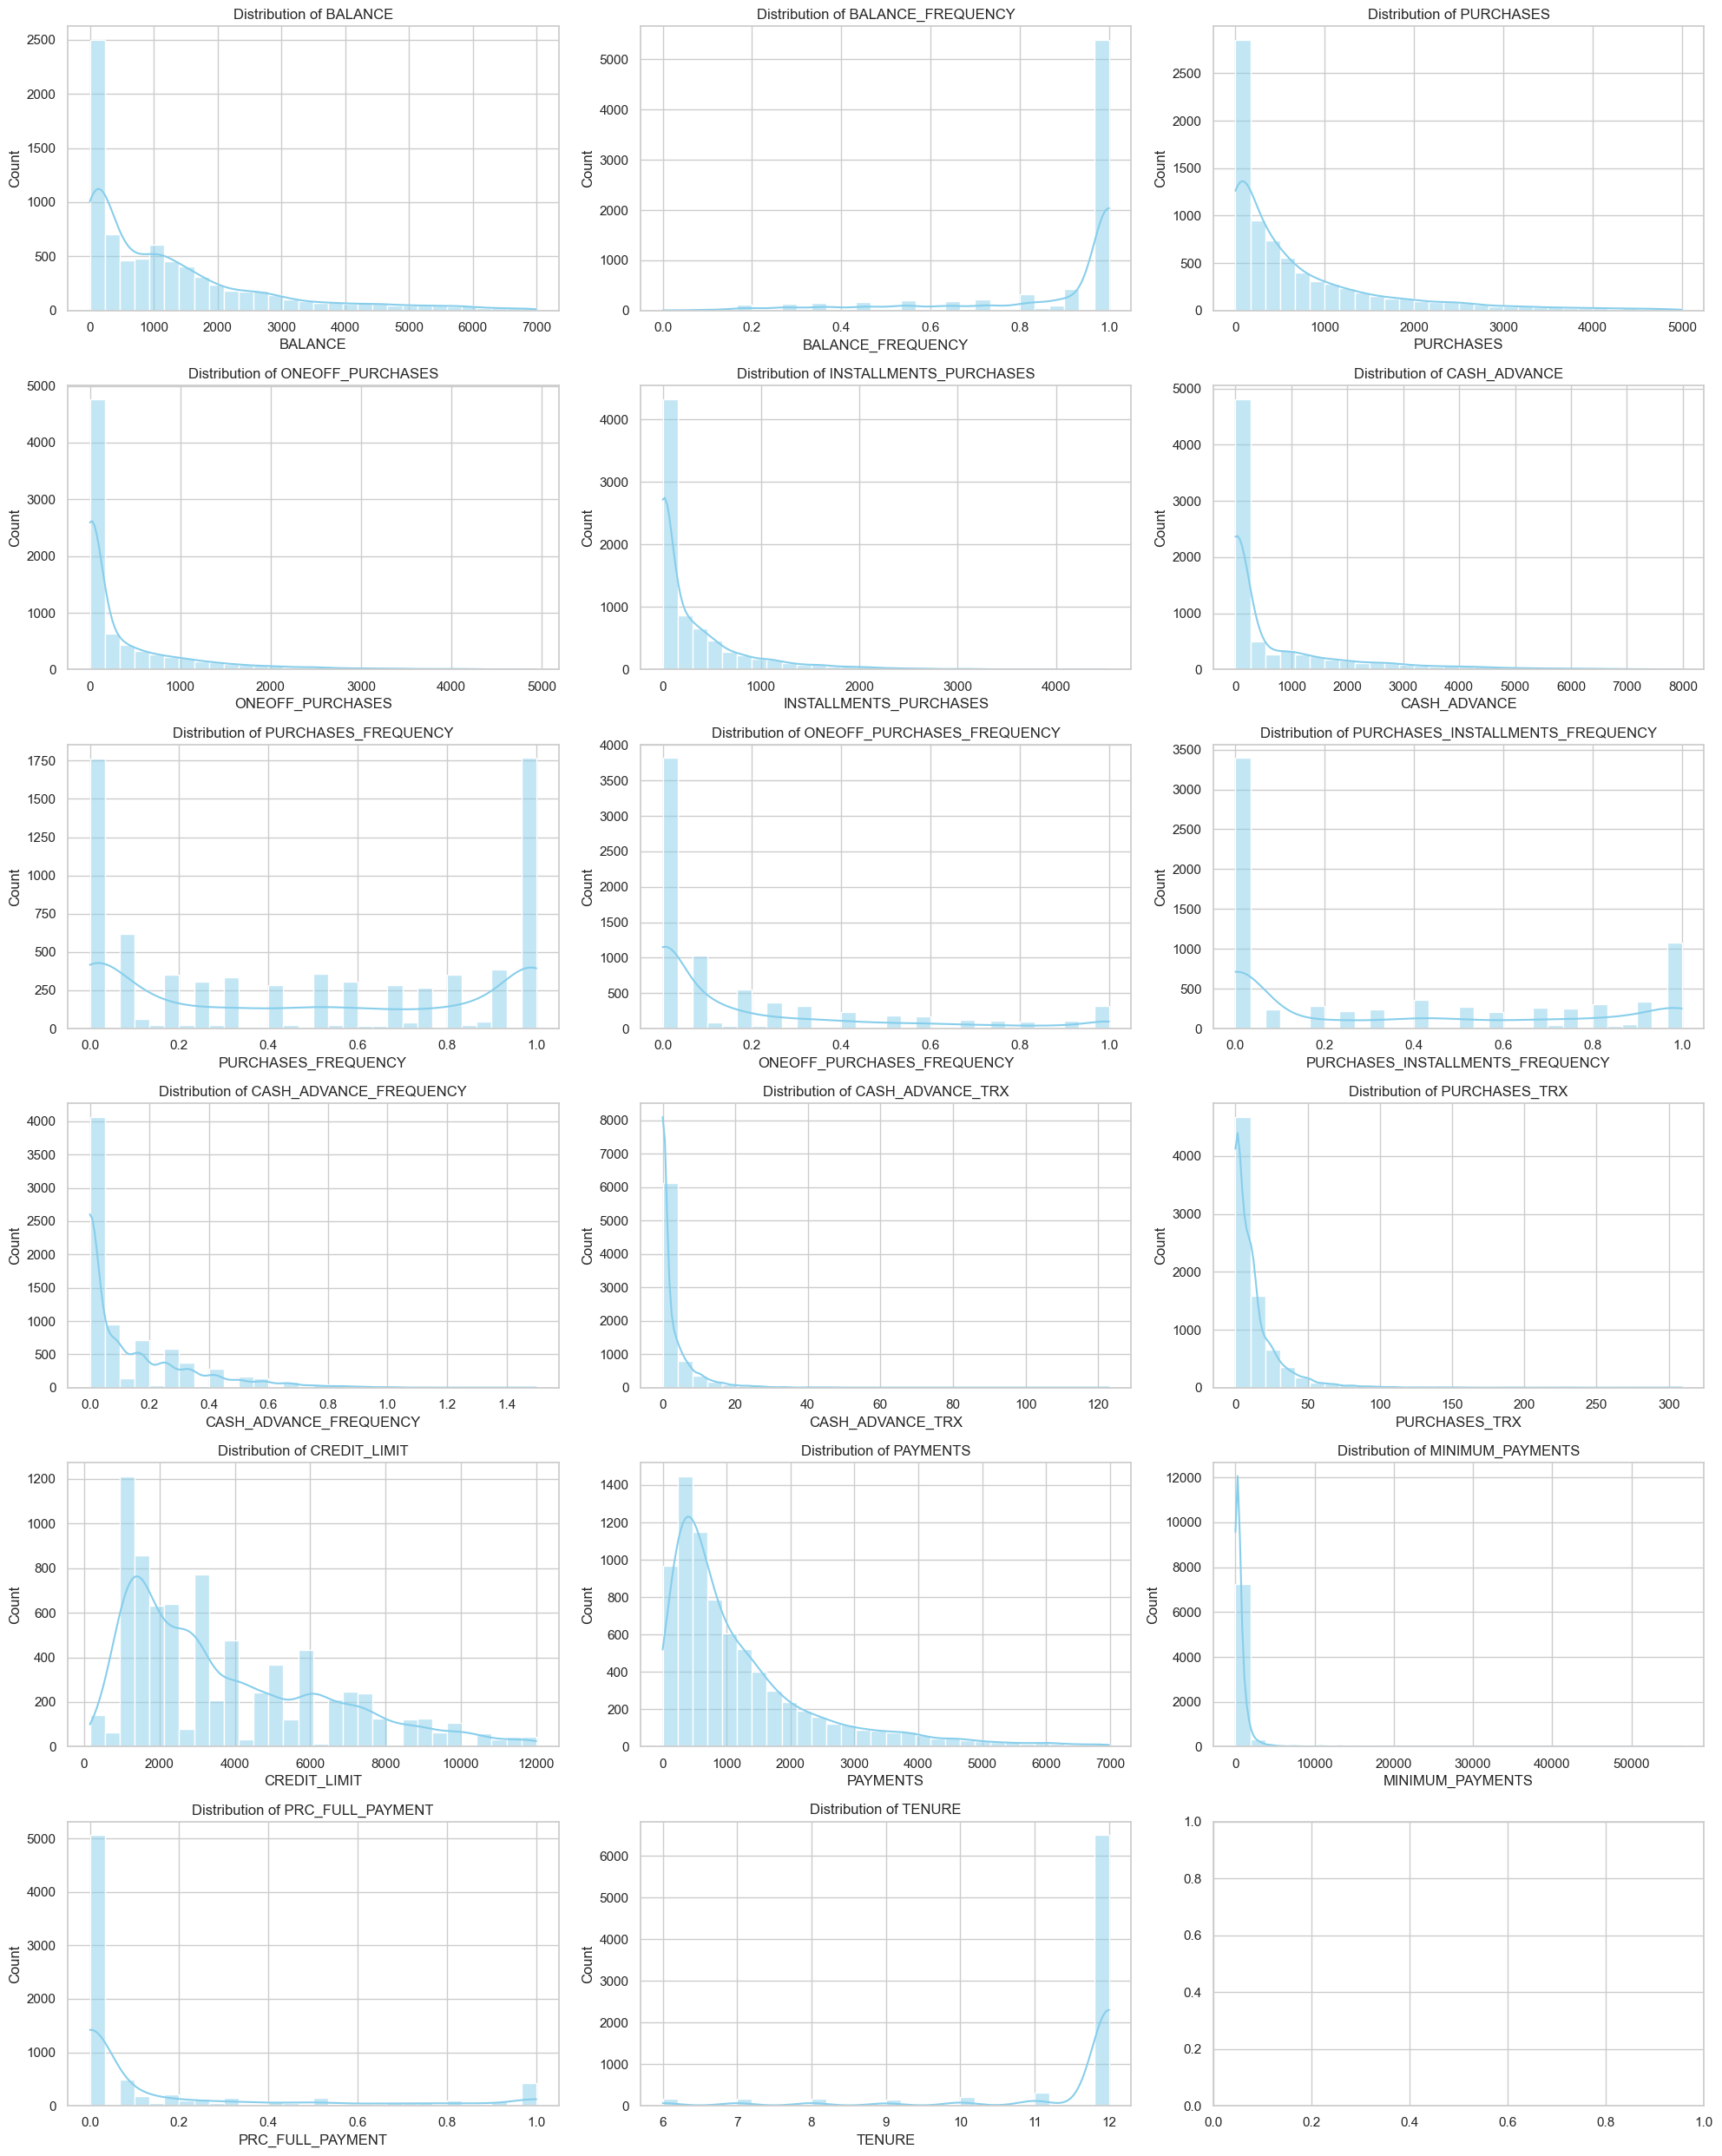

In [102]:
numerical_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

# Setting up subplots for histplot
fig, axes = plt.subplots(6, 3, figsize=(20, 25))

# Flattening the axes for easy iteration
axes = axes.flatten()

# Plotting histplot for each numerical column
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column].dropna(), kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7714 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           7714 non-null   object 
 1   BALANCE                           7714 non-null   float64
 2   BALANCE_FREQUENCY                 7714 non-null   float64
 3   PURCHASES                         7714 non-null   float64
 4   ONEOFF_PURCHASES                  7714 non-null   float64
 5   INSTALLMENTS_PURCHASES            7714 non-null   float64
 6   CASH_ADVANCE                      7714 non-null   float64
 7   PURCHASES_FREQUENCY               7714 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        7714 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  7714 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            7714 non-null   float64
 11  CASH_ADVANCE_TRX                  7714 non-null   int64  
 12  PURCHASES_T

In [104]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your DataFrame is named 'df'

# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Creating a new DataFrame for scaled features
scaled_df = df.copy()

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the selected numerical columns
scaled_df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Displaying the scaled DataFrame
print(scaled_df.head())


  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES   
0  C10001 -0.832707          -0.342648  -0.650295         -0.548590  \
1  C10002  1.345783           0.087838  -0.750965         -0.548590   
2  C10003  0.858403           0.518325   0.064914          0.549896   
4  C10005 -0.297440           0.518325  -0.734081         -0.525858   
5  C10006  0.386180           0.518325   0.655964         -0.548590   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
0               -0.428465     -0.555583            -0.799163  \
1               -0.605886      4.447240            -1.218696   
2               -0.605886     -0.555583             1.298495   
4               -0.605886     -0.555583            -1.008931   
5                1.873693     -0.555583             0.459432   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
0                   -0.657263                         -0.700460  \
1                   -0.657263                         

In [105]:
scaled_df = scaled_df.drop('CUST_ID', axis=1)

In [106]:
desc_stats = scaled_df.describe()
print(desc_stats)

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES   
count  7.714000e+03       7.714000e+03  7.714000e+03      7.714000e+03  \
mean   2.947546e-17      -2.136971e-16 -4.421319e-17      7.368864e-18   
std    1.000065e+00       1.000065e+00  1.000065e+00      1.000065e+00   
min   -8.608894e-01      -4.217028e+00 -7.509651e-01     -5.485903e-01   
25%   -7.769837e-01       4.478933e-02 -7.089587e-01     -5.485903e-01   
50%   -3.069961e-01       5.183246e-01 -3.885115e-01     -5.259150e-01   
75%    3.542471e-01       5.183246e-01  2.844330e-01      1.315541e-01   
max    3.959251e+00       5.183246e-01  4.521189e+00      6.468666e+00   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY   
count            7.714000e+03  7.714000e+03         7.714000e+03  \
mean            -2.394881e-17 -1.842216e-17         8.105751e-17   
std              1.000065e+00  1.000065e+00         1.000065e+00   
min             -6.058856e-01 -5.555835e-01        -1.218696e

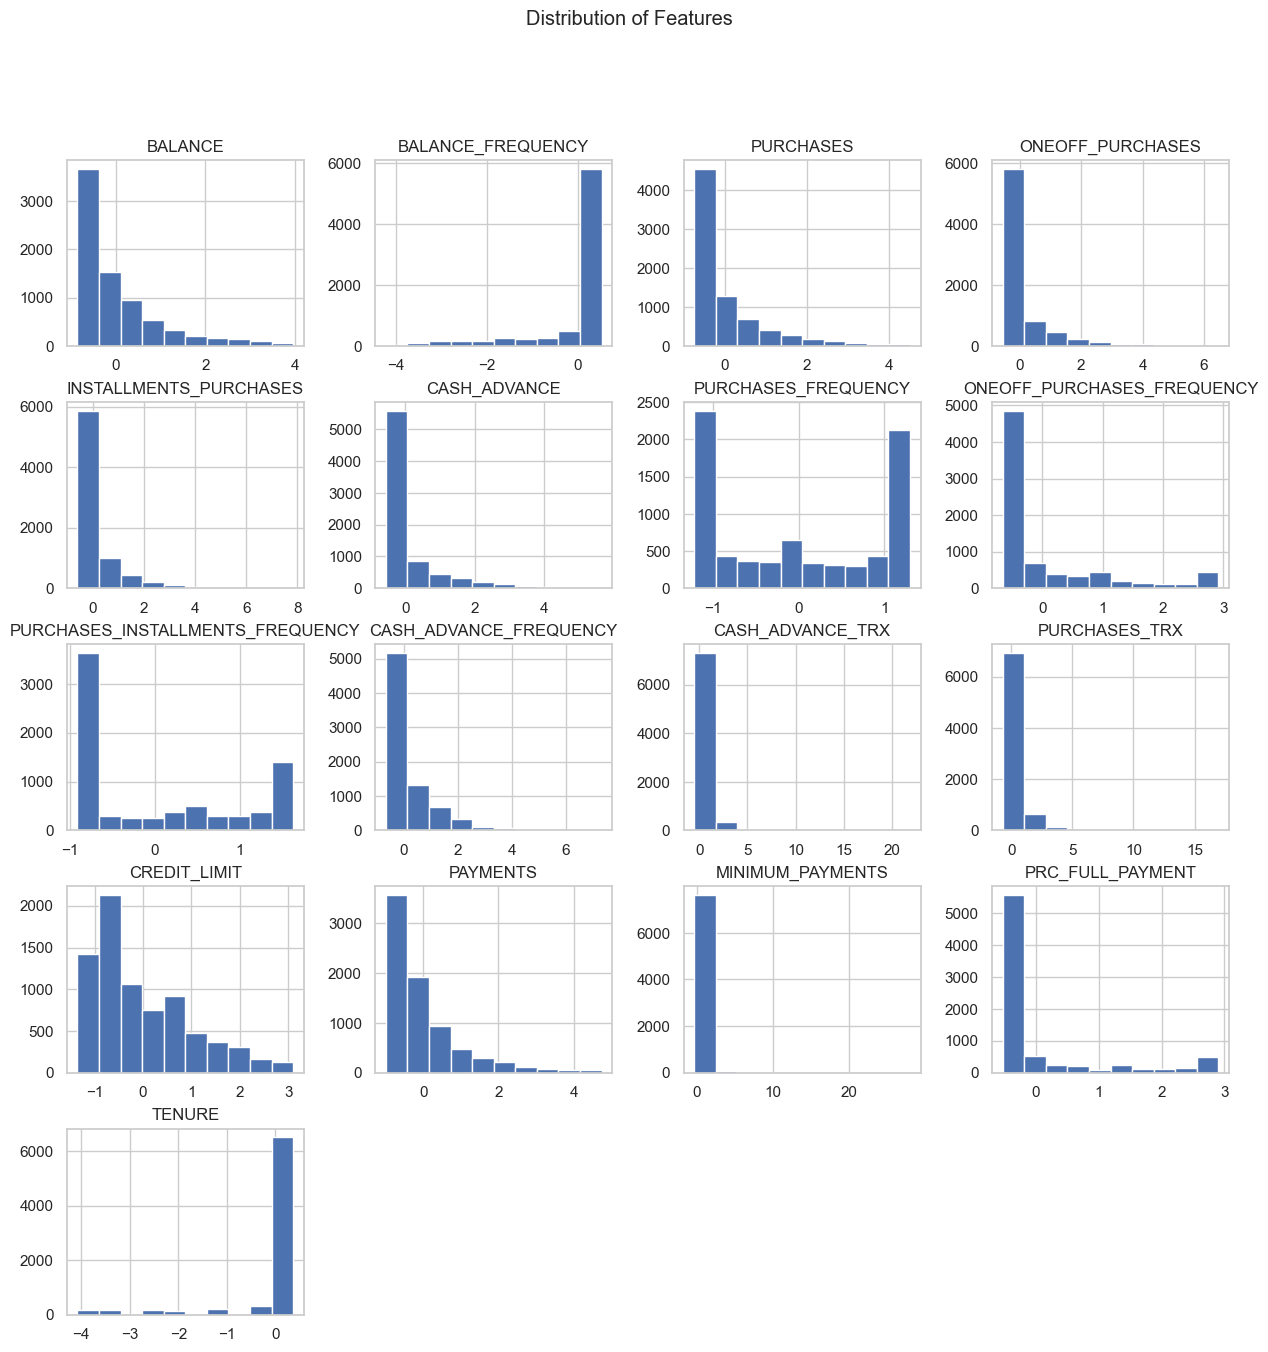

In [107]:
import matplotlib.pyplot as plt

# Histograms
scaled_df.hist(figsize=(15, 15))
plt.suptitle("Distribution of Features")
plt.show()


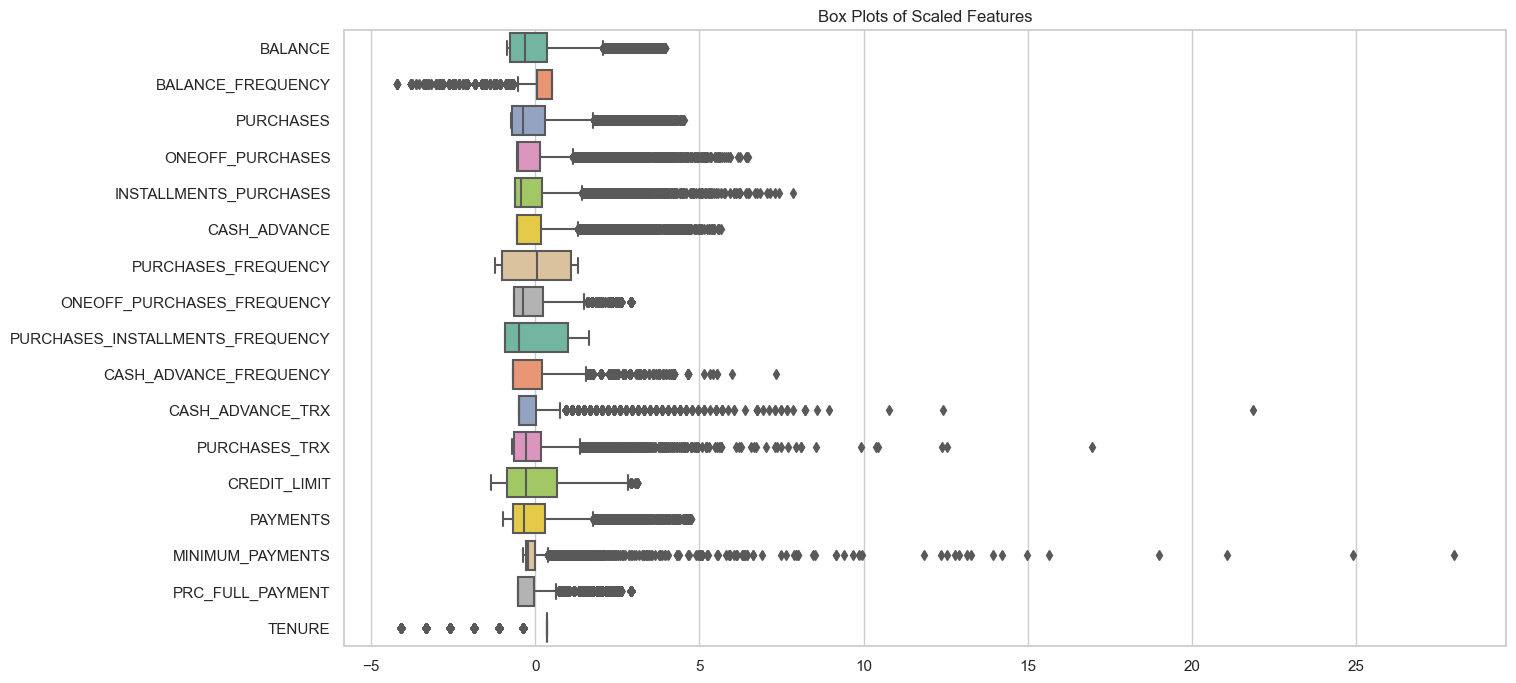

In [108]:
# Box plots for each scaled feature
plt.figure(figsize=(15, 8))
sns.boxplot(data=scaled_df, orient='h', palette='Set2')
plt.title('Box Plots of Scaled Features')
plt.show()

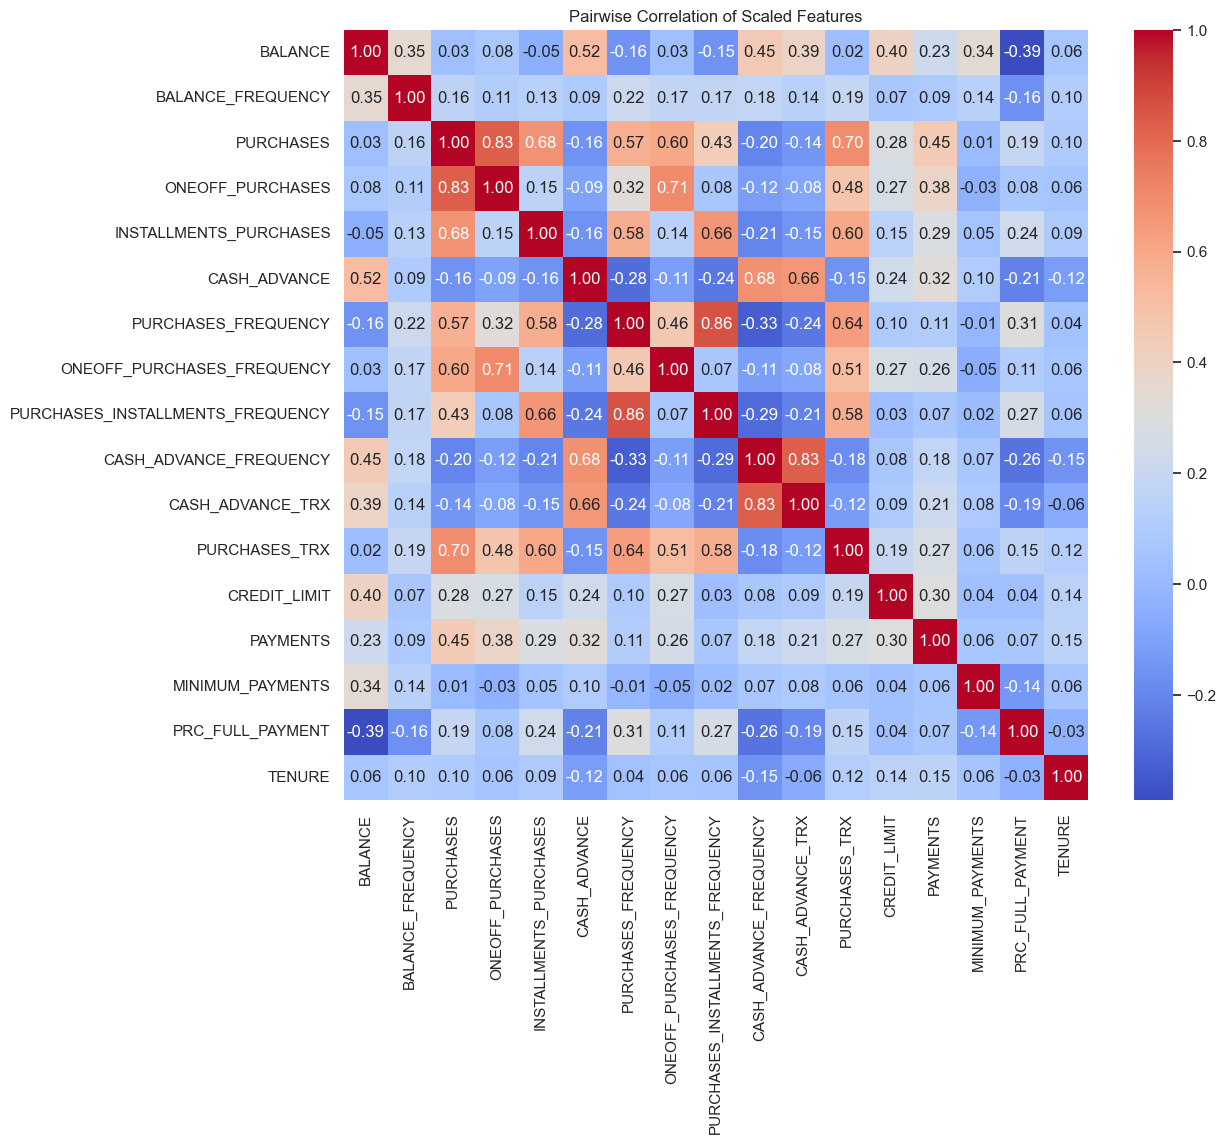

In [109]:
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pairwise Correlation of Scaled Features')
plt.show()

End of Data Processing and EDA

Data Processing 

1. The data was simple enough, with N/A values only in Credit Limit and Minimum Payments. Those were excluded
2. Next, through a series of box plots and general filters, exclusions were made based on outlier analysis. I took a call to not exclude all outliers for all fields, but for fields like balance, the outlier was a little bit over the box part of the box and whisker charts. Outliers were not excluded for fields like frequency where the value ranges in decimals with a 0.1 increment and it is not justifiable to exclude them with a simple greater or equal to value.
3. Finally, scaler transformation was done considering the data has all numerical fields, and on different scales (in tens of thousands vs decimals). Since it looked like the data followed somewhat of a patterned distribution, I decided to do a standard scaler. Scaling also helps because we are performing clustering, and some of the methods are distance-based, and eventually a feature having a larger scale might impact the clustering.

EDA

1. Now, looking at the data, there are some obvious relations, Purchase and Purchase TRX have a proportional relationship, similar to other fields. This may not help in clustering, but it does give an idea to the user that the data is somewhat normalized.
2. Based on the correlation matrix, there is a high correlation between Credit Limit and fields related to Purchases. So, customers with higher credit limits will make more purchases and could be clustered together.
3. Frequency fields like purchase frequency, one-off, and purchase installments also are positively correlated which means customers who make purchases more frequently also tend to make other purchases frequently.
4. There is a -ve correlation between PRC Full Payment and Cash Advance Frequency. This means that customers who make cash advances are less likely to pay their full statement balances(red alert customers?)
5. Tenure seems to have an overall low correlation with most features so may not have the best decision impact on clustering

# Clustering

1. Affinity

Affinity Propagation Silhouette Score: 0.18310431114976145


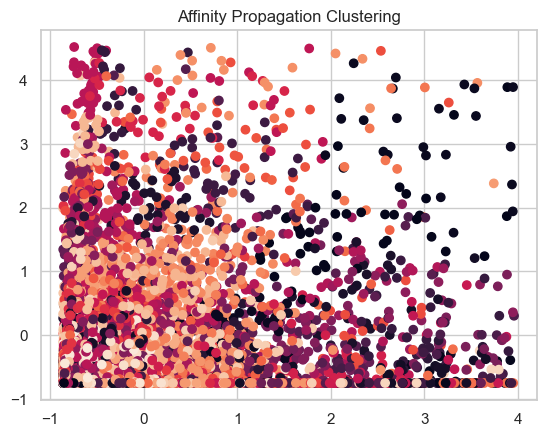

In [144]:
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 
'PAYMENTS', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
X = scaled_df[selected_features]

# Convert DataFrame to NumPy array
X_array = X.values

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X_array)

# Silhouette Score
af_sil_score = silhouette_score(X_array, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X_array[:, 0], X_array[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()


2. DBSCAN

DBSCAN Silhouette Score: -0.4327055302849896


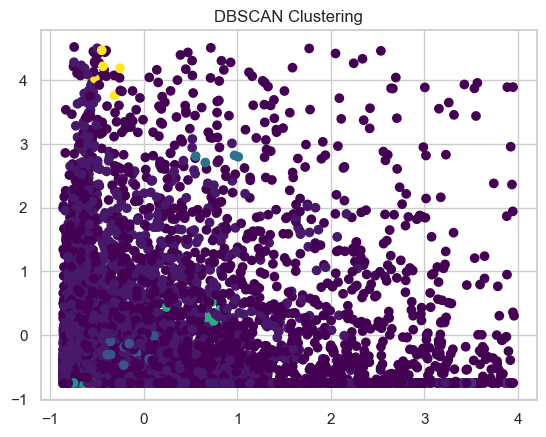

In [146]:
from sklearn.cluster import DBSCAN

selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 
'PAYMENTS', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
X = scaled_df[selected_features]


# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
# Note: DBSCAN can result in noise data point with label -1
# Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

3. K-Means

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

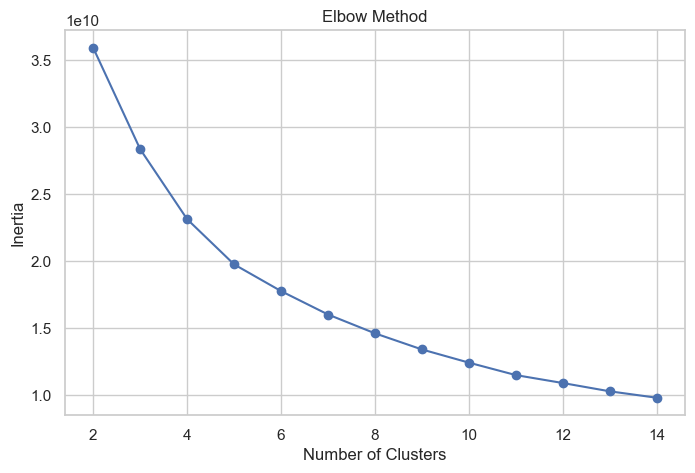

In [136]:

selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 
'PAYMENTS', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
X = df[selected_features]

inertia_values = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

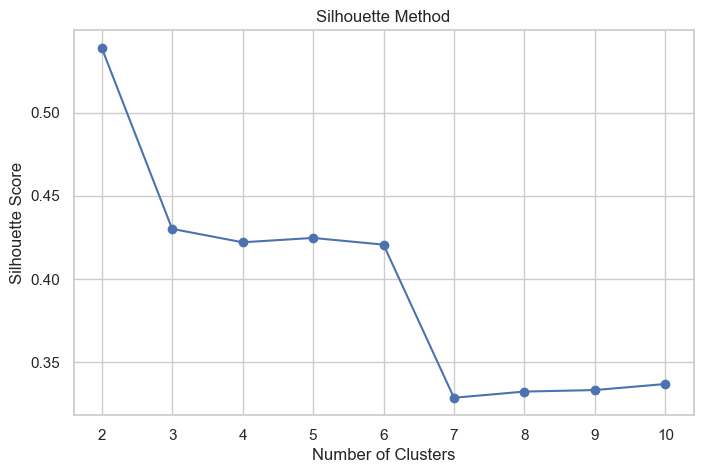

In [137]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Silhouette Method
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [138]:
# Selecting features
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 
'PAYMENTS', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']

# Extracting the selected features
X_selected = scaled_df[selected_features]

# Running K-means with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
scaled_df['KMeans_Clusters'] = kmeans.fit_predict(X_selected)

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


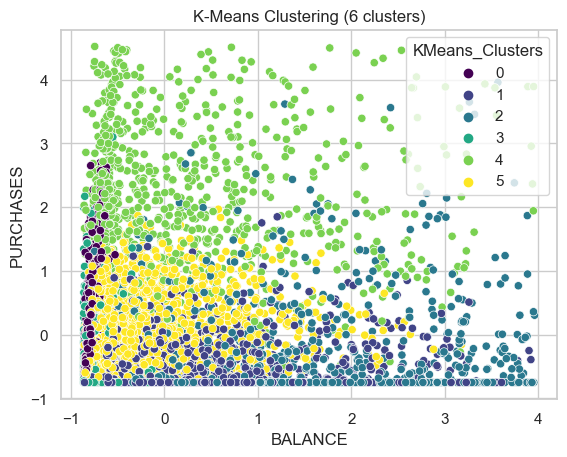

In [147]:
sns.set(style="whitegrid")

# Scatter plot for two selected features, you can modify these as needed
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='KMeans_Clusters', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering (6 clusters)')
plt.show()

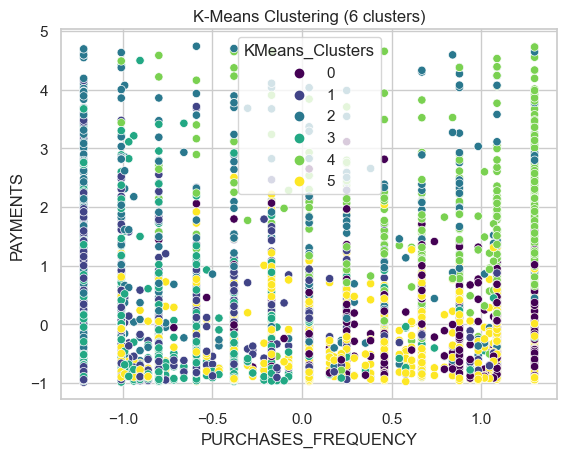

In [140]:
sns.set(style="whitegrid")

# Scatter plot for two selected features, you can modify these as needed
sns.scatterplot(x='PURCHASES_FREQUENCY', y='PAYMENTS', hue='KMeans_Clusters', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering (6 clusters)')
plt.show()

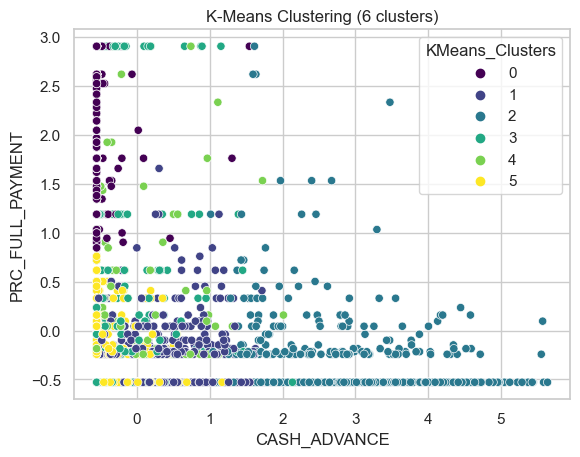

In [148]:
sns.set(style="whitegrid")

# Scatter plot for two selected features, you can modify these as needed
sns.scatterplot(x='CASH_ADVANCE', y='PRC_FULL_PAYMENT', hue='KMeans_Clusters', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering (6 clusters)')
plt.show()

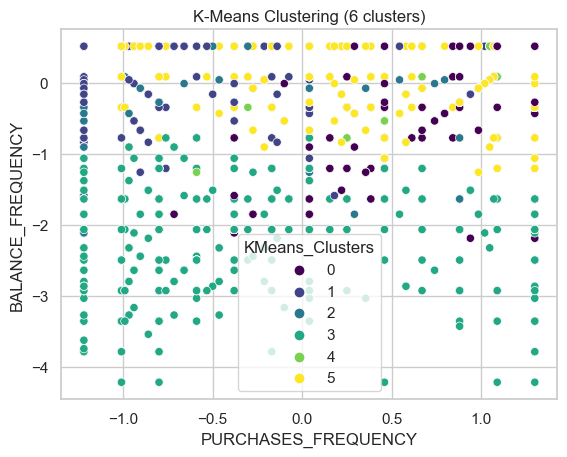

In [150]:
sns.set(style="whitegrid")

# Scatter plot for two selected features, you can modify these as needed
sns.scatterplot(x='PURCHASES_FREQUENCY', y='BALANCE_FREQUENCY', hue='KMeans_Clusters', data=scaled_df, palette='viridis')
plt.title('K-Means Clustering (6 clusters)')
plt.show()

Clustering has been performed using Affinity, DBSCAN, and K-Means. The results are discussed below:

1. Affinity- It uses a message passing algorithm which leads to inter-cluster grouping. With a moderate silhouette score, the scatterplot wasn't readable at all. Possibly the method was able to identify all the points in the data set, but there is significant overlapping in the data. It is not possible to derive any meaningful insight from this method for clustering.

2. DBSCAN- it is sensitive to data density which means in our case, it is struggling with varying point densities. It has a negative silhouette score, which signifies challenges in forming cohesive clusters. As is visible, it is also showing a lot of noise(dark colors). There is overlapping in DBSCAN as well, which means it is not able to handle irregularly shaped clusters or data not having a standard pattern.

3. KMeans- It is centroid-based, and has a good silhouette score for an optimal number of clusters (~0.43 for 6 clusters). This is the most readable clustering method for our analysis.  There is somewhat of an overlapping the clusters are still distinguishable, which we maybe due to KMeans not being able to handle centroid placement, but we can derive meaningful insights from them as discussed below.

# Interpretation and Business insights

We will be using the K Means algorithm to identify cluster patterns. The main observations are :

1. High to medium Purchase values pertain to the lower end of Balances(yellow and light green clusters).
2. High Balance clusters are relative to low Purchase customer IDs(sea green cluster)
3. Higher cash advance customers usually have a lower PRC Payment, and vice versa, this was observed as part of EDA as well
4. Purchase frequency and Balance Frequency are directly proportional and have the most distinguishable clusters. 

Cash Advance, PRC Payment, Purchase, and Balance Frequency help us distinguish the most between clusters.

Business Recommendations-
1. For high balance, low purchase customers- offer exclusive deals or incentives like reward points to increase their purchases
2. Higher Cash, Low PRC Customers- offer alternate payment methods using incentives (like cashback) to reduce reliance on cash payment
3. For high purchase and balance frequency clusters- offer personalized ads to make them incentivized to purchase more, or provide recommendations based on purchase history to increase customer loyalty.